In [414]:
from cw_analysis import plot_ppc_individual, calculate_ppc, process_multiple_ppc, make_array, normal_distribution_tests, find_best_mean, find_best_median, top_n_medians

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

import pandas as pd
from matplotlib import style
from matplotlib.pyplot import cm
import matplotlib.collections as mcoll

import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
import statistics

In [415]:
%load_ext autoreload
%autoreload 2

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [460]:
def plot_ppc_individual(b_moving_avg,s_moving_avg,t_moving_avg, value, title):
    time_period = list(range(0,len(b_moving_avg.index)))
    time_period_s = list(range(0,len(s_moving_avg.index)))
    time_period_t = list(range(0,len(t_moving_avg.index)))
    print(len(b_moving_avg))
    print(len(s_moving_avg))
    print(len(t_moving_avg))
    plt.plot(time_period_s, t_moving_avg, label='Total profit (B+S)', linestyle='-') 
    plt.plot(time_period, b_moving_avg, label='Buyer (B) profit',linestyle='-') 
    plt.plot(time_period_t, s_moving_avg, label='Seller (S) profit', linestyle='-')

    plt.ylabel("Profit Per Second (PPS)")
    plt.xlabel("Hours")
    plt.title(title+str(value))
    plt.legend(loc='best')


In [486]:
df = pd.read_csv('de_best_1/perfect/set_k5_f2.0_trial2_strats.csv',header=None)
best = df.loc[0][4]
prde = df.loc[0][18]

In [487]:
#calculating the moving average of pps for one trail - function
def calculate_ppc_balanced(file_name, value, title, save_location, plot):
    prde_b_new_df = pd.DataFrame()
    best_b_new_df = pd.DataFrame()
    prde_s_new_df = pd.DataFrame()
    best_s_new_df = pd.DataFrame()
    
    df = pd.read_csv(file_name+'_strats.csv',header=None)
    
    for row in range(0,len(df.index)):
        prde_b_sum = 0
        best_b_sum = 0
        prde_s_sum = 0
        best_s_sum = 0
    
        for col in range(4, 219, 7):              
            if (str(df.iloc[row][col]) == best):
                best_b_sum +=df.loc[row][col+4]
                
            elif(df.loc[row][col] == prde):
                prde_b_sum +=df.loc[row][col+4]
                
        best_b_new_df.loc[len(best_b_new_df.index), 0] = best_b_sum
        prde_b_new_df.loc[len(prde_b_new_df.index), 0] = prde_b_sum
                
        for col in range (221, 428,7):
            if (str(df.iloc[row][col]) == best):
                best_s_sum +=df.loc[row][col+4]
            elif(df.loc[row][col] == prde):
                prde_s_sum +=df.loc[row][col+4]
                
        best_s_new_df.loc[len(best_s_new_df.index), 0] = best_s_sum
        prde_s_new_df.loc[len(prde_s_new_df.index), 0] = prde_s_sum
    
#     s_new_df.replace(np.nan, 0)
#     b_new_df.replace(np.nan, 0)
#     print(best_b_new_df.index)
        
    best_b_moving_avg = best_b_new_df.loc[:,0].rolling(5).mean()
    best_s_moving_avg = best_s_new_df.loc[:,0].rolling(5).mean() 
    np.nan_to_num(best_b_moving_avg)
    np.nan_to_num(best_s_moving_avg)
    best_t_moving_avg = np.add(best_b_moving_avg,best_s_moving_avg)
    
    prde_b_moving_avg = prde_b_new_df.loc[:,0].rolling(5).mean()
    prde_s_moving_avg = prde_s_new_df.loc[:,0].rolling(5).mean() 
    np.nan_to_num(prde_b_moving_avg)
    np.nan_to_num(prde_s_moving_avg)
    prde_t_moving_avg = np.add(prde_b_moving_avg,prde_s_moving_avg)
    
    print(best_s_moving_avg)
    
    if (plot == True):
        plot_ppc_individual(best_b_moving_avg,best_s_moving_avg,best_t_moving_avg, value, "(DE/best/1) " + title)
        plt.savefig(save_location+"best.png", dpi=400, facecolor="white")
        
        plt.show()
        plot_ppc_individual(prde_b_moving_avg,prde_s_moving_avg,prde_t_moving_avg, value, "(DE/rand/1) " + title)
        plt.savefig(save_location+"rand.png", dpi=400, facecolor="white")
    
    return best_t_moving_avg, prde_t_moving_avg, len(df.index)



In [402]:
plt.rcParams.update({'font.size': 18})

In [ ]:
plot_ppc_individual()

# 3 Day Trials - Perfect Elasticity

0            NaN
1            NaN
2            NaN
3            NaN
4      69.444247
         ...    
67    144.828037
68    144.600193
69    143.172548
70    140.084445
71    140.230983
Name: 0, Length: 72, dtype: float64
72
72
72


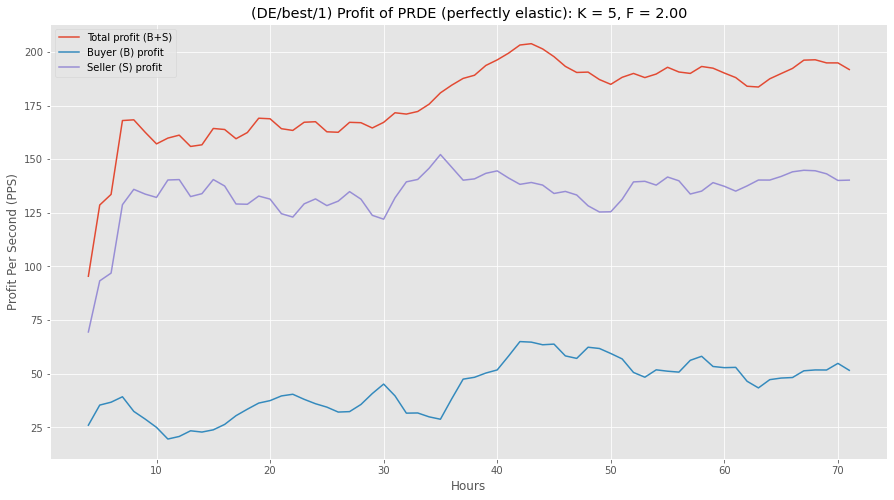

72
72
72


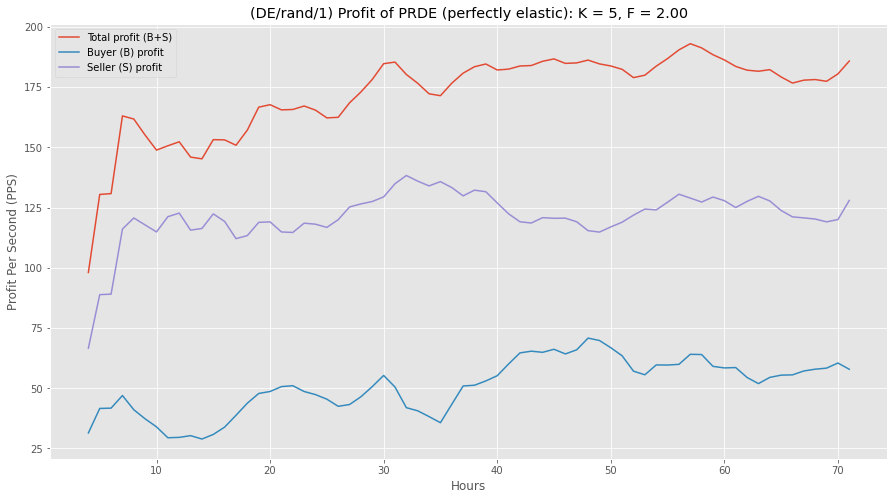

In [488]:
best_total, rand_total, index_len = calculate_ppc_balanced('de_best_1/perfect/set_k5_f2.0_trial2', 0, "Profit of PRDE (perfectly elastic): K = 5, F = 2.0", "de_best_1/perfect/", True)

In [471]:
best_total.median()

0.0

In [472]:
rand_total.median()

178.60207260000004

In [144]:
rand = make_array(rand_total)
best = make_array(best_total)

### Distribution Analysis 

In [145]:
_, p = stats.shapiro(rand)
p

1.3547017206746916e-14

In [162]:
# import statsmodels.api as sm

# #create Q-Q plot with 45-degree line added to plot
# fig = sm.qqplot(best_b_new_df, line='45')
# plt.show()

In [401]:
# normal_distribution_tests(el_all_sma_set_f_3d[0:1], False)
# sns.distplot(rand, hist=True, kde=False, bins=int(180/5), hist_kws={'edgecolor':'black'})
# plt.title("PRDE tarder (K=4 F=0.8) distribution of total PPS")
# plt.ylabel("Count")
# plt.xlabel("Total (B+S) Profit Per Second")
# plt.legend(loc='best')
# plt.show()

# sns.distplot(best, hist=True, kde=False, bins=int(180/5), hist_kws={'edgecolor':'black'})
# plt.title("PRDE tarder (K=4 F=0.8) distribution of total PPS")
# plt.ylabel("Count")
# plt.xlabel("Total (B+S) Profit Per Second")
# plt.legend(loc='best')

### Median Analysis 


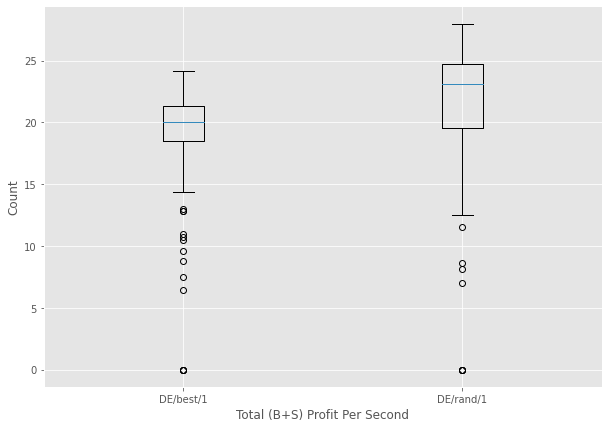

In [410]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot((rand, best))
plt.ylabel("Count")
plt.xlabel("Total (B+S) Profit Per Second")
plt.xticks([1, 2], ['DE/best/1', 'DE/rand/1'])
plt.show()

### Mann-whitney 

In [134]:
from scipy.stats import norm
from scipy.stats import mannwhitneyu

res, p = mannwhitneyu(rand, best)
print(format(p))

1.2741573318888246e-20


# 5 Days Trails - Unit Elasticity

0      NaN
1      NaN
2      NaN
3      NaN
4      0.0
      ... 
115    0.0
116    0.0
117    0.0
118    0.0
119    0.0
Name: 0, Length: 120, dtype: float64
120
120
120


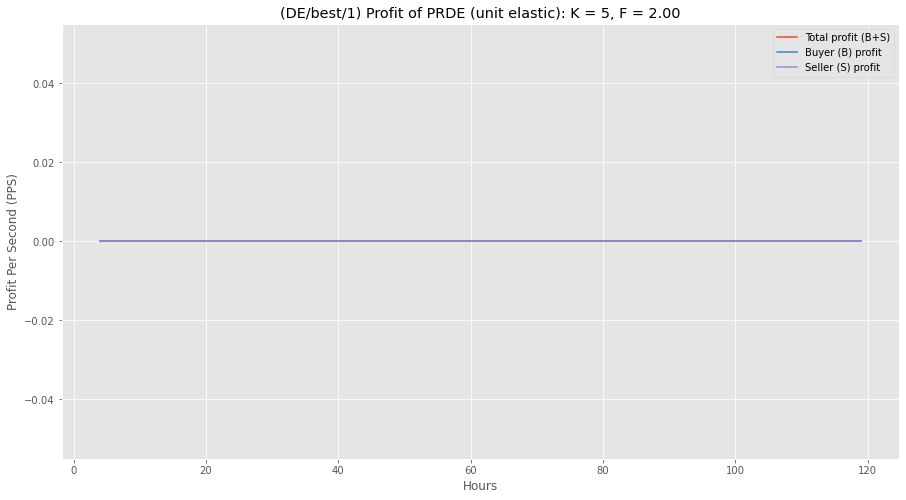

120
120
120


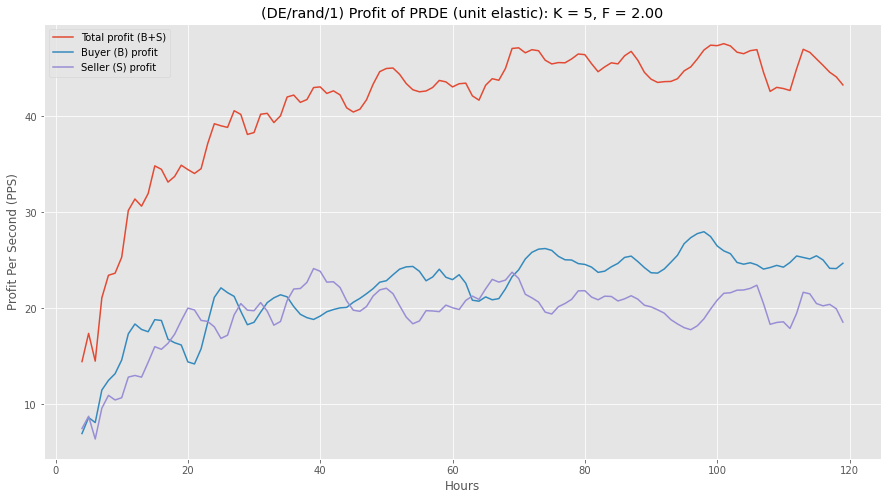

In [555]:
best_total, rand_total, index_len = calculate_ppc_balanced('de_best_1/unit/set_k5_f2.0_trial2', 0, "Profit of PRDE (unit elastic): K = 5, F = 2.0", "de_best_1/unit/", True)

In [543]:
rand = make_array(rand_total)
best = make_array(best_total)

best_total.median()
rand_total.median()

43.3806297

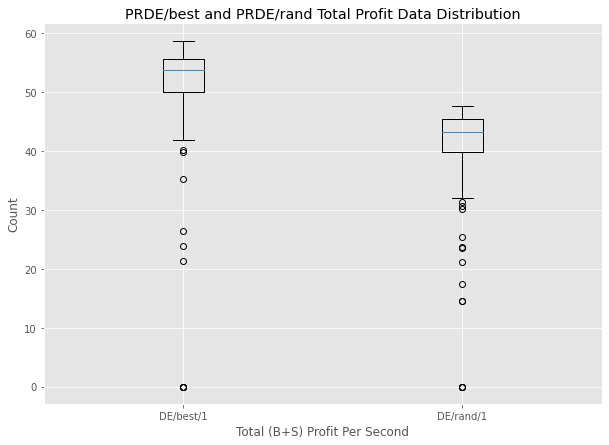

In [491]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot((best, rand))
plt.title("PRDE/best and PRDE/rand Total Profit Data Distribution")
plt.ylabel("Count")
plt.xlabel("Total (B+S) Profit Per Second")
plt.xticks([1, 2], ['DE/best/1', 'DE/rand/1'])
plt.show()


In [190]:
# def calculate_ppc_15(file_name, value, title, save_location, plot):
#     b_new_df = pd.DataFrame()
#     s_new_df = pd.DataFrame()
    
#     df = pd.read_csv(file_name+'_strats.csv',header=None)
    
#     for row in range(0,len(df.index)):
#         b_sum = 0
#         s_sum = 0

#         for col in range (8, 113 ,7):
#             b_sum +=df.loc[row][col]
#         b_new_df.loc[len(b_new_df.index), 0] = b_sum

#         for col in range (120, 197,7):
#             print(df.loc[row][col])
#             s_sum +=df.loc[row][col]
#         s_new_df.loc[len(s_new_df.index), 0] = s_sum
    
# #     s_new_df.replace(np.nan, 0)
# #     b_new_df.replace(np.nan, 0)
    
#     b_moving_avg = b_new_df.loc[:,0].rolling(5).mean()
#     s_moving_avg = s_new_df.loc[:,0].rolling(5).mean() 
#     np.nan_to_num(b_moving_avg)
#     np.nan_to_num(s_moving_avg)
#     t_moving_avg = np.add(b_moving_avg,s_moving_avg)
    

#     if (plot == True):
#         plot_ppc_individual(b_moving_avg,s_moving_avg,t_moving_avg, value, title)
#         plt.savefig(save_location, dpi=400, facecolor="white")
    
#     return t_moving_avg, len(df.index)


# JADE

In [587]:
df = pd.read_csv('jade/perfect/set_k5_f2.0_trial3_strats.csv',header=None)
jade = df.iloc[0][11]
prde = df.iloc[0][4]

print(jade, prde)

 JADE  PRDE


In [588]:
#calculating the moving average of pps for one trail - function
def calculate_ppc_jade(file_name, value, title, save_location, plot):
    prde_b_new_df = pd.DataFrame()
    best_b_new_df = pd.DataFrame()
    prde_s_new_df = pd.DataFrame()
    best_s_new_df = pd.DataFrame()
    
    df = pd.read_csv(file_name+'_strats.csv',header=None)
    
    for row in range(0,len(df.index)):
        prde_b_sum = 0
        best_b_sum = 0
        prde_s_sum = 0
        best_s_sum = 0
    
        for col in range(4, 219, 7):              
            if (str(df.iloc[row][col]) == jade):
                best_b_sum +=df.loc[row][col+4]
                
            elif(df.loc[row][col] == prde ):
                prde_b_sum +=df.loc[row][col+4]
                
        best_b_new_df.loc[len(best_b_new_df.index), 0] = best_b_sum
        prde_b_new_df.loc[len(prde_b_new_df.index), 0] = prde_b_sum
                
        for col in range (221, 428,7):
            if (str(df.iloc[row][col]) == jade):
                best_s_sum +=df.loc[row][col+4]
            elif(df.loc[row][col] == prde):
                prde_s_sum +=df.loc[row][col+4]
                
        best_s_new_df.loc[len(best_s_new_df.index), 0] = best_s_sum
        prde_s_new_df.loc[len(prde_s_new_df.index), 0] = prde_s_sum
    
#     s_new_df.replace(np.nan, 0)
#     b_new_df.replace(np.nan, 0)
#     print(best_b_new_df.index)
        
    best_b_moving_avg = best_b_new_df.loc[:,0].rolling(5).mean()
    best_s_moving_avg = best_s_new_df.loc[:,0].rolling(5).mean() 
    np.nan_to_num(best_b_moving_avg)
    np.nan_to_num(best_s_moving_avg)
    best_t_moving_avg = np.add(best_b_moving_avg,best_s_moving_avg)
    
    prde_b_moving_avg = prde_b_new_df.loc[:,0].rolling(5).mean()
    prde_s_moving_avg = prde_s_new_df.loc[:,0].rolling(5).mean() 
    np.nan_to_num(prde_b_moving_avg)
    np.nan_to_num(prde_s_moving_avg)
    prde_t_moving_avg = np.add(prde_b_moving_avg,prde_s_moving_avg)
    
    
    if (plot == True):
        plot_ppc_individual(best_b_moving_avg,best_s_moving_avg,best_t_moving_avg, value, "(JADE) " + title)
        plt.savefig(save_location+"best.png", dpi=400, facecolor="white")
        
        plt.show()
        plot_ppc_individual(prde_b_moving_avg,prde_s_moving_avg,prde_t_moving_avg, value, "(DE/rand/1) " + title)
        plt.savefig(save_location+"rand.png", dpi=400, facecolor="white")
    
    return best_t_moving_avg, prde_t_moving_avg, len(df.index)



120
120
120


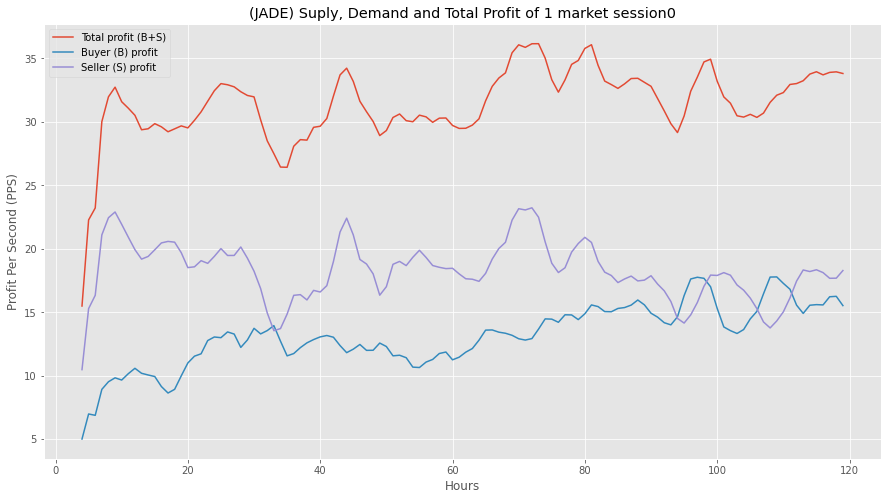

120
120
120


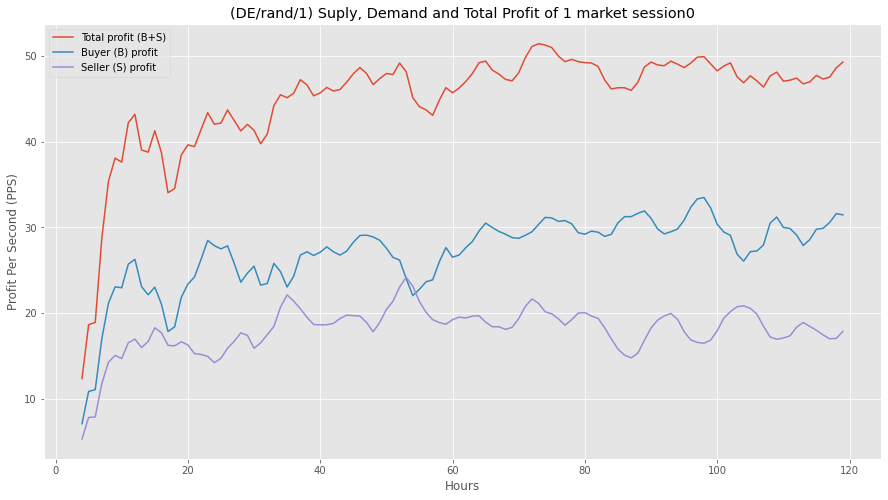

In [616]:
best_total, rand_total, index_len = calculate_ppc_jade('jade/perfect/set_k5_f2.0_trial3', 0, "Suply, Demand and Total Profit of 1 market session", "jade/perfect/trial13_", True)

120
120
120


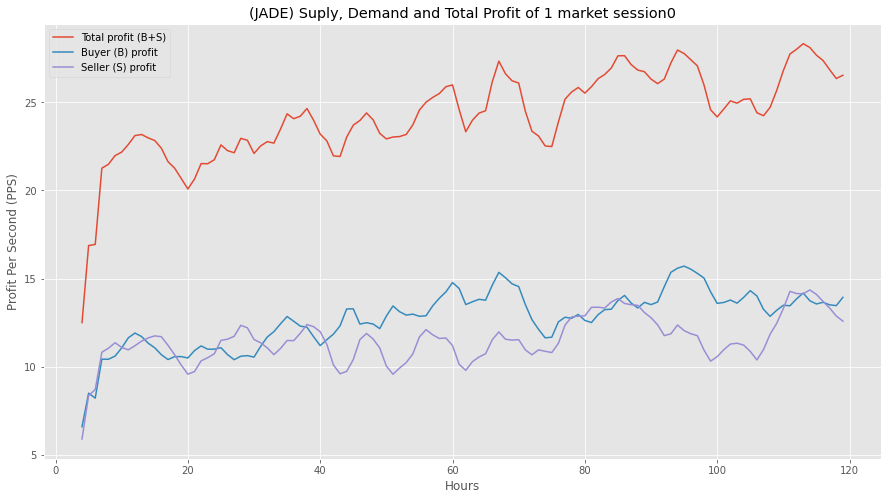

120
120
120


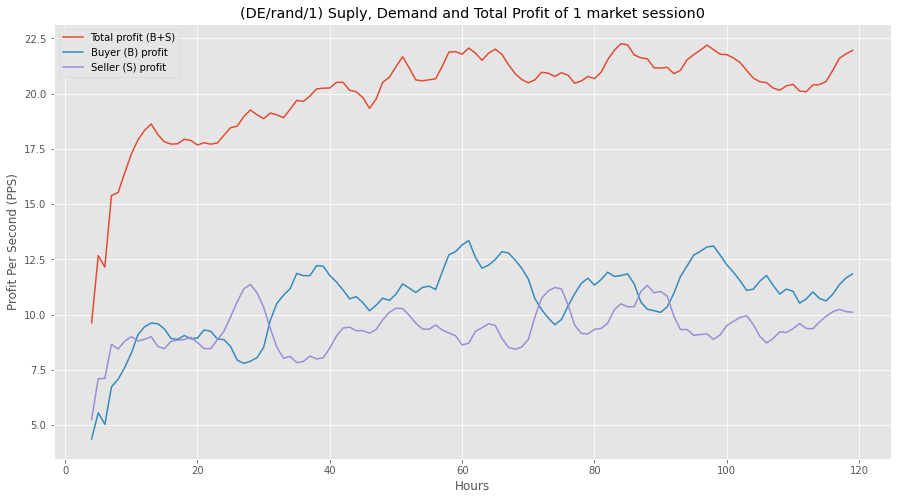

In [605]:
best_total, rand_total, index_len = calculate_ppc_jade('jade/unit/set_k5_f2.0_trial5', 0, "Suply, Demand and Total Profit of 1 market session", "jade/unit/trial5_", True)

19
19
19


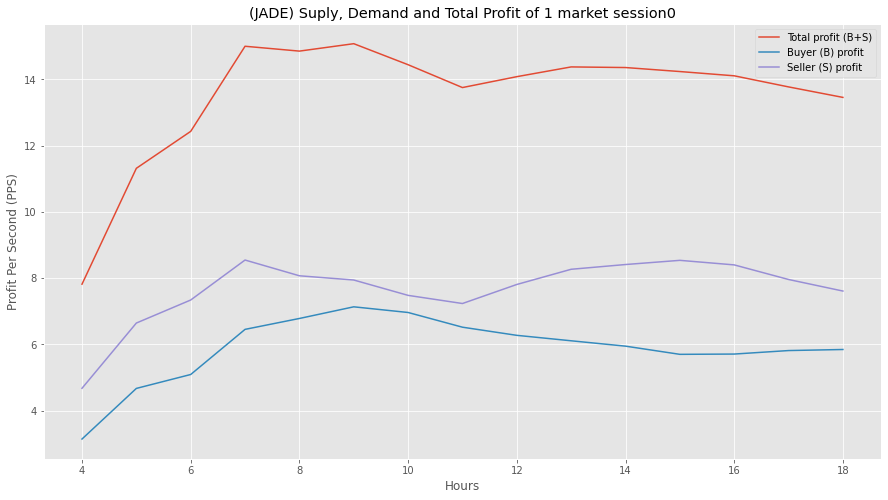

19
19
19


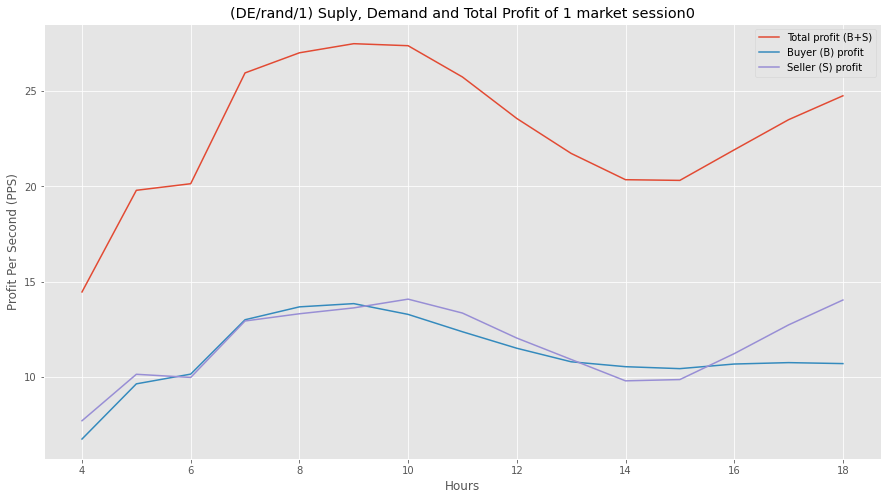

In [624]:
best_total, rand_total, index_len = calculate_ppc_jade('jade/unit/set_k5_f2.0_trial6', 0, "Suply, Demand and Total Profit of 1 market session", "jade/unit/trial6_", True)

In [609]:
rand = make_array(rand_total)
best = make_array(best_total)

print(best_total.median())
print(rand_total.median())

21.052394800000016
20.82159699999999


In [622]:
# best_total, rand_total, index_len = calculate_ppc_jade('jade/perfect/set_k5_f2.0_trial6', 0, "Suply, Demand and Total Profit of 1 market session", "jade/perfect/trial16_", True)